# **Trabajo Practico Final - Probabilidad Aplicada**
![Imagen](http://www.inspt.utn.edu.ar/images/aragna_.png)
### Profesora: ***Chan, Debora***
### Alumno: ***Mermoz, Daniel Alberto***

*En el presente cuaderno se realizara un analisis sobre la poblacion de alumnos de 1er año del Instituto Nacional Superior del Profesorado Tecnico (INSPT) correspondiente al 2018*

#### Carga de librerias

In [63]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

## ------------------------------------------------

#### Carga la base de Datos 


In [64]:
df= pd.read_excel('Relevamiento Alumnos 2018.xlsx')
rows = len(df)
columns = df.columns.size
print('\nHay un total de ',rows,' datos en ',columns,' columnas cargados correctamente')


Hay un total de  105  datos en  20  columnas cargados correctamente


## ------------------------------------------------

#### A la hora de mostrar la dataframe se puede utilizar alguno de los siguientes codigos
<pre>
df:         para toda la DataFrame
dfhead(5):  para las primeras 5 filas
df.loc:     para seleccionar que filas y columnas quiero mostrar </pre>
##### (Por una cuestion de visualizacion se opto por cortar las columnas que se muestran)


In [82]:
print("\nFiltrado parcial para mostrar la DataFrame")
df[["Comision","Edad","Genero","Promedio final del secundario", "¿Trabajas actualmente?"]]



Filtrado parcial para mostrar la DataFrame


,Comision,Edad,Genero,Promedio final del secundario,¿Trabajas actualmente?
0,1-604 TN,26,Femenino,9.20,Si
1,1-604 TN,28,Femenino,9.20,Si
2,1-604 TN,39,Masculino,7.63,Si
3,1-601 TM,36,Masculino,8.41,No
4,1-604 TT,23,Femenino,9.53,Si
...,...,...,...,...,...
100,1-604 TT,21,Femenino,7.12,No
101,1-602 TM,18,Masculino,8.06,Si
102,1-602 TM,27,Masculino,8.98,No
103,1-604 TN,29,Masculino,9.87,Si


## ------------------------------------------------

#### Mediante el comando `df.describe()` recibo algunos datos relevantes sobre la DataFrame
<pre>
#mean:      Media
#std:       Desviacion Estandar
#min:       Mínimo
#25,50,75   Percentil
#max:       Máximo
</pre>

In [66]:
df.describe()

,Edad,Altura,Promedio final del secundario,Año de egreso de la escuela secundaria
count,105.000000,105.000000,105.000000,105.000000
mean,26.742857,1.727524,7.841714,2009.019048
std,6.836031,0.123076,0.978765,6.076406
min,18.000000,1.510000,6.050000,1996.000000
25%,22.000000,1.640000,7.190000,2005.000000
50%,25.000000,1.740000,7.600000,2011.000000
75%,30.000000,1.790000,8.570000,2014.000000
max,64.000000,1.980000,9.890000,2017.000000


## ------------------------------------------------

#### Filtrado de DataFrame

La funcion `dropna` nos elimina los registros sin algun dato (una vez realizado en la DF actual, pasan a ser 92)</p>
Otra opcion es usar la funcion `fillna` la cual nos reemplaza los datos vacios en el registro con un dato especificado (en este caso reemplazo el N/A de la columna por un "no especificado")


In [67]:
df_filtrado = df.fillna({"¿Qué te motivó a inscribiste en esta carrera?": "No especificado"})
rowsfil = len(df_filtrado)
columnsfil = df_filtrado.columns.size
print('\nHay un total de ',rowsfil,' datos en ',columnsfil,' columnas en el dataframe filtrado')
df = df_filtrado


Hay un total de  105  datos en  20  columnas en el dataframe filtrado


## ------------------------------------------------

#### Se realizara un analisis de acuerdo al genero de los estudiantes
En el mismo se verá en un grafico de "torta" el porcentaje de alumnos de cada sexo sobre el total de 105 alumnos

<AxesSubplot:>

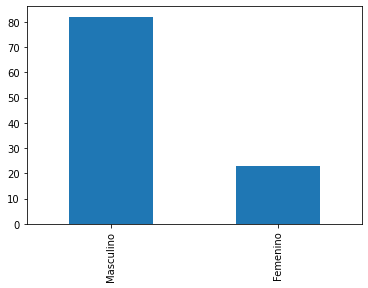

In [68]:
serie = df.Genero.value_counts()
cantM = serie[0]
cantF = serie[1]
serie
serie.plot.bar()

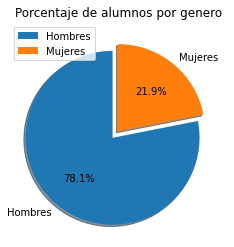

In [69]:

genero = 'Hombres', 'Mujeres'
porcM = round(cantM/rows*100,2)
porcF = round(cantF/rows*100,2)
sizes = [porcM, porcF]
explode = (0.1, 0)  
plt.pie(sizes, explode=explode, labels=genero, autopct='%2.1f%%',
        shadow=True, startangle=90)
plt.title("Porcentaje de alumnos por genero")
plt.legend()
plt.show()


##### *Obsevaciones*

El grafico pone en evidencia una clara predominancia de estudiantes masculinos en el periodo estudiado, llegando casi a ser 8 de cada 10 alumnos ingresantes al Instituto en el 2018 varones.

## ------------------------------------------------

#### Se analizara la altura de los estudiantes mediante un grafico de barras

Text(0.5, 1.0, 'Altura de los alumnos masculinos')

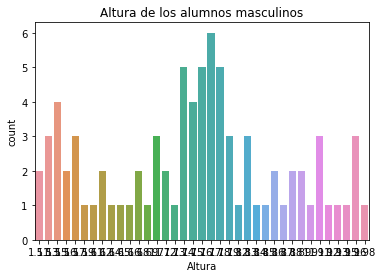

In [70]:
dfGH = df[["Genero","Altura"]]
dfGH = dfGH[dfGH["Genero"].str.contains("Masculino")]
Genero = dfGH.Genero
Altura = dfGH.Altura

#sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x=Altura)
plt.title("Altura de los alumnos masculinos")

Text(0.5, 1.0, 'Altura de los alumnas Femeninas')

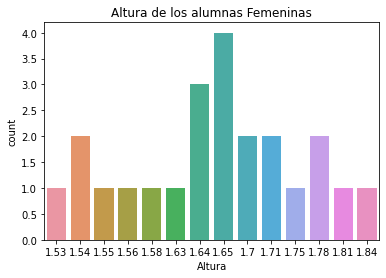

In [71]:
dfGH = df[["Genero","Altura"]]
dfGH = dfGH[dfGH["Genero"].str.contains("Femenino")]
Genero = dfGH.Genero
Altura = dfGH.Altura

#sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x=Altura)
plt.title("Altura de los alumnas Femeninas")

## ------------------------------------------------

#### Histograma de edades segun sexo de los estudiantes

Primero se selecciona de la DF solamente las columnas de Genero y Edad luego filtrar las edades que corresponden a los estudiantes masculinos y guardarlos en una lista llamada `EdadMasc` y se hace lo mismo con la edad de las estudiantes femeninas para fuardarselo en una lista llamada `EdadFem`

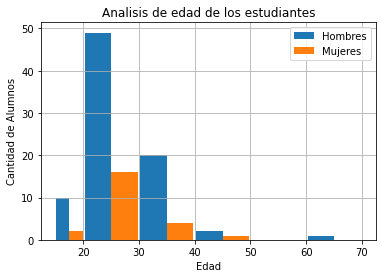

In [72]:
dfGE = df[["Genero","Edad"]]
dfMasc = dfGE[dfGE["Genero"].str.contains("Masc")]
EdadMasc = dfMasc.Edad
EdadMasc

dfGE = df[["Genero","Edad"]]
dfMasc = dfGE[dfGE["Genero"].str.contains("Fem")]
EdadFem = dfMasc.Edad
EdadFem

plt.xlabel("Edad")
plt.ylabel("Cantidad de Alumnos")
plt.title("Analisis de edad de los estudiantes")
plt.hist([EdadMasc, EdadFem],bins=[15,20,30,40,50,60,70],rwidth=.95,label=["Hombres","Mujeres"])
plt.legend()
plt.grid()

##### *Obsevaciones*

En base al histograma y en concordancia con lo que nos adelantaba el grafico de torta, se observa una gran predominancia de alumnos masculinos en todas las franjas etarias, excepto en la franja de 40 a 50 años donde se ve un acercamiento entre la cantidad de estudiantes de ambos sexos, para confirmar si esto es asi o no habria que acceder a datos de otros años a ver si se mantiene esa caracteristica. 
Por otro lado este grafico nos permite observar una gran predominancia de estudiantes de entre 20 y 30 años, seguidos por la franja etaria de entre los 30 y 40 años. 

## ------------------------------------------------

#### Grafico de Caja y violin de altura segun sexo de los estudiantes

Primero se selecciona de la DF solamente las columnas de Genero y Altura para luego relizar el grafico de cajas y violin. La sub DataFrame en base a la cual se greficara se llamara `Altura`.

In [73]:
altura = df[["Genero","Altura"]]
fig = plt.figure(figsize=(5,3))
fig = px.box(altura, x="Genero", y="Altura")
fig2 = px.box(altura, y="Altura")
fig.show()
fig2.show()

<Figure size 360x216 with 0 Axes>

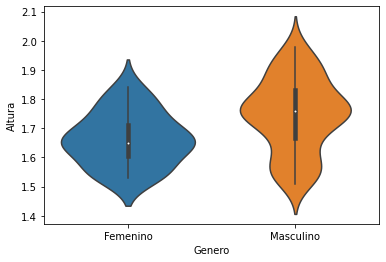

In [74]:
ax=sns.violinplot(data=altura, x="Genero", y="Altura", inner="box")

##### *Obsevaciones*

Estos graficos nos permiten observar que en general los estudiantes hombres son mas altos que las estudiantes mujeres, estando su media en 1,76 Mts. mientras que la media de las mujeres es de 1.65 Mts. Por otro lado se observa que la altura de las mujeres esta mas concentrada ya que la caja esta mas concetrada (dentro de la caja se encuentra el 50% mas frecuente), esto se convalida con lo que se observa en el grafico de violin ya que se observa que tiene una distribucion aproximadamente normal donde la mayor concentracion de valores se encuentra cercana a la media. </p>
En el caso de los hombres, las alturas se encuentran un poco mas dispersas con respecto a su media y tambien se observa un rango mas amplio ya que las alturas van desde los 1.51 a 1.98 (tiene un rango de .47) mientras que la de las mujeres esta mas concentrada ya que va de 1.53 a 1.84 (tiene un rango de .31).</p>
El grafico de box sin discriminar sexo pone en evidencia que la mayor cantidad de hombres hace que tanto la media total de alturas como la distribucion de los estudiantes en su totalidad se acerque mas a la de los hombres que a la de las mujeres. 


## ------------------------------------------------

#### Graficos de Barras 

Text(0.5, 1.0, 'Cantidad de alumnos por comision')

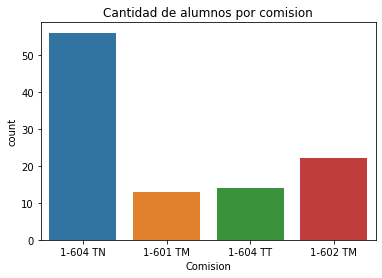

In [75]:
dfGH = df[["Comision","¿Trabajas actualmente?"]]
Comision = dfGH.Comision
sns.countplot(x=Comision)
plt.title("Cantidad de alumnos por comision")

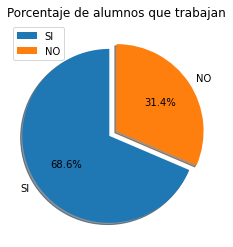

In [76]:
Trabaja = dfGH["¿Trabajas actualmente?"]
si= Trabaja.value_counts()[0]/105
no= Trabaja.value_counts()[1]/105
sizes = [si,no]
explode = (0.1, 0)  
plt.pie(sizes, explode=explode, labels=["SI","NO"], autopct='%2.1f%%',
        shadow=True, startangle=90)
plt.title("Porcentaje de alumnos que trabajan")
plt.legend()
plt.show()

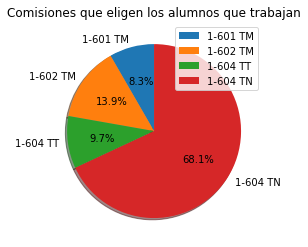

In [77]:
dfGH = df[["Comision","¿Trabajas actualmente?"]]
trabajadores = dfGH[dfGH["¿Trabajas actualmente?"].str.contains("Si")]
TN = trabajadores.value_counts()[0]/Trabaja.value_counts()[0]
TM2 = trabajadores.value_counts()[1]/Trabaja.value_counts()[0]
TT = trabajadores.value_counts()[2]/Trabaja.value_counts()[0]
TM1 = trabajadores.value_counts()[3]/Trabaja.value_counts()[0]
sizes = [TM1, TM2, TT, TN]
plt.pie(sizes, labels=["1-601 TM","1-602 TM","1-604 TT","1-604 TN"], 
        autopct='%2.1f%%',
        shadow=True, 
        startangle=90, 
        normalize=True)
plt.title("Comisiones que eligen los alumnos que trabajan")
plt.legend()
plt.show()

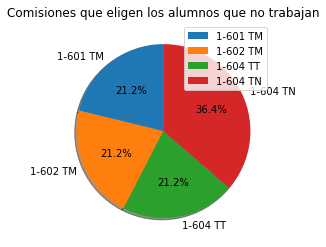

In [78]:
dfGH = df[["Comision","¿Trabajas actualmente?"]]
trabajadores = dfGH[dfGH["¿Trabajas actualmente?"].str.contains("No")]
TN = trabajadores.value_counts()[0]/Trabaja.value_counts()[1]
TM2 = trabajadores.value_counts()[1]/Trabaja.value_counts()[1]
TT = trabajadores.value_counts()[2]/Trabaja.value_counts()[1]
TM1 = trabajadores.value_counts()[3]/Trabaja.value_counts()[1]
sizes = [TM1, TM2, TT, TN]
plt.pie(sizes, labels=["1-601 TM","1-602 TM","1-604 TT","1-604 TN"], 
        autopct='%2.1f%%',
        shadow=True, 
        startangle=90, 
        normalize=True)
plt.title("Comisiones que eligen los alumnos que no trabajan")
plt.legend()
plt.show()

##### *Obsevaciones*

Estos graficos nos permiten observar que la mayoria de los alumnos que se inscribieron en el periodo estudiado trabajan (casi el 70%) y ademas la mayoria de los alumnos que trabaja eligio el turno noche para cursar (esto se condice con lo que se percibe en el instituto)</p>
A la hora de estudiar el comportamiento de los alumnos que no trabajan se observa un equilibrio mayor entre las distintas comisiones aunque sigue predominando la comision del turno noche, las comisiones `1-601 TM` y `1-602 TM` corresponden al turno mañana, por ende hay un equilibrio entre la cantidad de alumnos que no trabajan que eligen el turno mañana y los que eligen el turno noche. </p>
Lo que si se obserba en ambos estudiantes es que muy pocos eligen el turno tarde a la hora de inscribirse. 


## ------------------------------------------------

#### Analisis de Notas

<AxesSubplot:xlabel='Promedio final del secundario', ylabel='Count'>

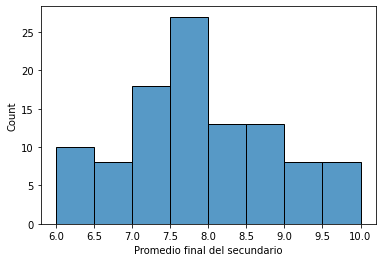

In [79]:
sns.histplot(df["Promedio final del secundario"], bins=[6,6.5,7,7.5,8,8.5,9,9.5,10])

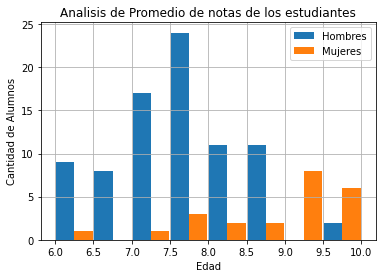

In [81]:
dfGE = df[["Genero","Promedio final del secundario"]]
dfMasc = dfGE[dfGE["Genero"].str.contains("Masc")]
PromMasc = dfMasc["Promedio final del secundario"]
dfGE = df[["Genero","Promedio final del secundario"]]
dfFem = dfGE[dfGE["Genero"].str.contains("Fem")]
PromFem = dfFem["Promedio final del secundario"]
plt.xlabel("Edad")
plt.ylabel("Cantidad de Alumnos")
plt.title("Analisis de Promedio de notas de los estudiantes")
plt.hist([PromMasc, PromFem],bins=[6,6.5,7,7.5,8,8.5,9,9.5,10],rwidth=.95,label=["Hombres","Mujeres"])
plt.legend()
plt.grid()

##### *Obsevaciones*

A traves del histograma se observa que la mayoria de los alumnos tuvieron un promedio de entre 7 y 8 en el secundario, sin embargo al desglosar entre los hombres y mujeres, se observa que las mujeres tienen un promedio mas alto que los hombres, sin embargo por ser poblacion mayoritaria los hombres eso no se percibe en el histograma total, el cual se asemeja mas al parcial masculino
